In [1]:
import importlib
imported_module = importlib.import_module("sql_commands")
importlib.reload(imported_module)
import sql_commands
from sql_commands import *
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
make db with sizes 0.2, 0.4, and 0.6 and run same time comparison
for every query(1,2,3,4):
    for every database(100mb,200mb,300mb):
        for every null rate(1%,5%):
            run query and get time
            run query+ and get time
            get range
"""

'\nmake db with sizes 0.2, 0.4, and 0.6 and run same time comparison\nfor every query(1,2,3,4):\n    for every database(100mb,200mb,300mb):\n        for every null rate(1%,5%):\n            run query and get time\n            run query+ and get time\n            get range\n'

In [3]:
db_sizes = ["100MB", "200MB", "200MB"]
db_names = ['tpch', 'tpch_200mb', 'tpch_300mb']
null_rates = [0.01, 0.05]
mydb, mycursor = sql_commands.connect_to_db("tpch_2pct")
results_dir = "bigger_instances"
if not os.path.exists(results_dir):
    # If it doesn't exist, create it
    os.makedirs(results_dir)

# Query 1

In [4]:
q1_nations = ['UNITED KINGDOM', 'ARGENTINA', 'PERU', 'FRANCE', 'BRAZIL']
q1_results = []
for db_name in db_names:
    print(db_name)
    intermediate_results = []
    for null_rate in null_rates:
        null_rate_pct = int(null_rate * 100)
        actual_db_name = f"{db_name}_{null_rate_pct}pct"
        #print("Using", actual_db_name)
        mydb, mycursor = sql_commands.connect_to_db(actual_db_name)
        ratios = []
        for i in range(5):
            result, q1_time, nation = run_query1(mycursor, q1_nations[i%len(q1_nations)], simple=False)
            result, q1_mod_time = run_query1_modified(mycursor, nation)
            ratio = q1_mod_time / q1_time
            ratios.append(ratio)
        avg = np.mean(ratios)
        # print(null_rate, avg)
        intermediate_results.append(avg)
    min = np.min(intermediate_results)
    max = np.max(intermediate_results)
    # print((min,max))
    q1_results.append((min,max))


tpch


tpch_200mb
tpch_300mb


In [5]:
q1_results

[(0.8683956290791774, 0.946186380931001),
 (0.9071143886350811, 0.9360914287484053),
 (0.9561287305532575, 1.0346466488663086)]

# Query 2

In [6]:
all_nations_raw = sql_commands.run_query(mycursor, "SELECT N_NAME FROM NATION")
all_nations = []
for nation in all_nations_raw:
    n = nation[0]
    if n is not None:
        all_nations.append(n)

In [7]:
q2_results = []
for db_name in db_names:
    print(db_name)
    intermediate_results = []
    for null_rate in null_rates:
        null_rate_pct = int(null_rate * 100)
        actual_db_name = f"{db_name}_{null_rate_pct}pct"
        #print("Using", actual_db_name)
        mydb, mycursor = sql_commands.connect_to_db(actual_db_name)
        ratios = []
        for i in range(5):
            nations = tuple(random.sample(all_nations, 7))
            result, q2_time, countries = run_query2(mycursor, nations, simple=False)
            result, q2_mod_time = run_query2_modified(mycursor, countries)
            ratio = q2_mod_time / q2_time
            ratios.append(ratio)
        avg = np.mean(ratios)
        # print(null_rate, avg)
        intermediate_results.append(avg)
    min = np.min(intermediate_results)
    max = np.max(intermediate_results)
    print((min,max))
    q2_results.append((min,max))

tpch
(0.1127049608937412, 0.23801510134978923)
tpch_200mb
(0.06861577773768664, 0.09486989884314716)
tpch_300mb
(0.047670303354817624, 0.07575960659654664)


# Query 3

In [8]:
q3_results = []
for db_name in db_names:
    print(db_name)
    intermediate_results = []
    for null_rate in null_rates:
        null_rate_pct = int(null_rate * 100)
        actual_db_name = f"{db_name}_{null_rate_pct}pct"
        #print("Using", actual_db_name)
        mydb, mycursor = sql_commands.connect_to_db(actual_db_name)
        ratios = []
        for i in range(5):
            result, q3_time, supp_key = run_query3(mycursor, simple=False)
            result, q3_mod_time = run_query3_modified(mycursor, supp_key)
            ratio = q3_mod_time / q3_time
            ratios.append(ratio)
        avg = np.mean(ratios)
        # print(null_rate, avg)
        intermediate_results.append(avg)
    min = np.min(intermediate_results)
    max = np.max(intermediate_results)
    print((min,max))
    q3_results.append((min,max))

tpch
(0.7492490614047992, 0.8417325210650972)
tpch_200mb
(1.0951861305119537, 1.1078400769928565)
tpch_300mb
(0.9812205527199744, 1.2022899835108851)


# Query 4

In [9]:
q4_results = []
for db_name in db_names:
    print(db_name)
    intermediate_results = []
    for null_rate in null_rates:
        null_rate_pct = int(null_rate * 100)
        actual_db_name = f"{db_name}_{null_rate_pct}pct"
        #print("Using", actual_db_name)
        mydb, mycursor = sql_commands.connect_to_db(actual_db_name)
        ratios = []
        for i in range(1):
            result, q4_time, nation, color = run_query4(mycursor, all_nations, simple=False)
            result, q4_mod_time = run_query4_modified(mycursor, nation, color)
            ratio = q4_mod_time / q4_time
            # print("times", q4_mod_time, q4_time)
            ratios.append(ratio)
        avg = np.mean(ratios)
        # print(null_rate, avg)
        intermediate_results.append(avg)
    min = np.min(intermediate_results)
    max = np.max(intermediate_results)
    print((min,max))
    q4_results.append((min,max))

tpch


(3.232017908405726, 280.34773591479836)
tpch_200mb
(10.263812491456296, 857.8659418227004)
tpch_300mb
(30.77609480384296, 1648.8418106501667)


In [10]:
rows = zip(q1_results, q2_results, q3_results, q4_results)
# Open the file in write mode and use csv.writer to write the rows
path = f"{results_dir}/bigger_instances_results.csv"
with open(path, "w", newline="") as csv_file:
    writer = csv.writer(csv_file)
    # writer.writerow(header_row)
    writer.writerows(rows)

print("CSV data has been written to", path)

CSV data has been written to bigger_instances/bigger_instances_results.csv


In [11]:
import ast
file_path = f"{results_dir}/bigger_instances_results.csv"
header_row = ['100MB', '200MB', '300MB']
custom_index = ['Q1', 'Q2', 'Q3', 'Q4']

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, header=None)

# Transpose the DataFrame and add custom indices
df_transposed = df.T
df_transposed.columns = header_row
df_transposed.index = custom_index

def str_to_tuple(s):
    return ast.literal_eval(s)

df_converted = df_transposed.applymap(str_to_tuple)

def round_tuple(t):
    return tuple(round(value, 5) for value in t)

df_rounded = df_converted.applymap(round_tuple)

def format_tuple(t):
    return "{:.4f} - {:.4f}".format(t[0], t[1])

df_formatted = df_rounded.applymap(format_tuple)

df_formatted.head()

,100MB,200MB,300MB
Q1,0.8684 - 0.9462,0.9071 - 0.9361,0.9561 - 1.0347
Q2,0.1127 - 0.2380,0.0686 - 0.0949,0.0477 - 0.0758
Q3,0.7492 - 0.8417,1.0952 - 1.1078,0.9812 - 1.2023
Q4,3.2320 - 280.3477,10.2638 - 857.8659,30.7761 - 1648.8418


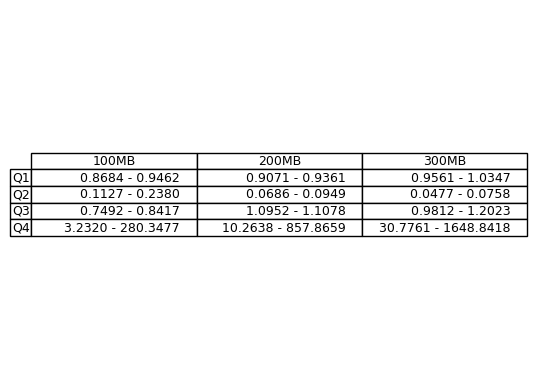

In [12]:
# Create a figure and axis
fig, ax = plt.subplots()

# Hide axes
ax.axis('off')

# Create a table
table = ax.table(cellText=df_formatted.values,
                 colLabels=df_formatted.columns,
                 rowLabels=df_formatted.index,  # Include index as row labels
                 loc='center')

# Set font size
table.auto_set_font_size(True)
# table.set_fontsize(9)

# Save the table as an image
plt.savefig(f'{results_dir}/bigger_instances_final.png', bbox_inches='tight', pad_inches=0.1)